# Exploratory Data Analysis Using Python and BigQuery



## Learning Objectives

1. Analyze a Pandas Dataframe
2. Create Seaborn plots for Exploratory Data Analysis in Python 
3. Write a SQL query to pick up specific fields from a BigQuery dataset
4. Exploratory Analysis in BigQuery


## Introduction 
This lab is an introduction to linear regression using Python and Scikit-Learn.  This lab serves as a foundation for more complex algorithms and machine learning models that you will encounter in the course. We will train a linear regression model to predict housing price.

Each learning objective will correspond to a __#TODO__ in this student lab notebook -- try to complete this notebook first and then review the [solution notebook](../solutions/python.BQ_explore_data.ipynb). 


### Import Libraries

In [ ]:
# !sudo chown -R jupyter:jupyter /home/jupyter/training-data-analyst

In [95]:
# !pip install google-cloud-bigquery==1.25.0
# !export GOOGLE_APPLICATION_CREDENTIALS=/Users/k-kakimoto/.config/gcloud/project-036dfba0-6f20-4903-e71bc0de3bc9.json

Found existing installation: google-cloud-bigquery 1.25.0
Uninstalling google-cloud-bigquery-1.25.0:
  Would remove:
    /Users/k-kakimoto/PycharmProjects/training-data-analyst/.venv/lib/python3.9/site-packages/google/cloud/bigquery/*
    /Users/k-kakimoto/PycharmProjects/training-data-analyst/.venv/lib/python3.9/site-packages/google/cloud/bigquery_v2/*
    /Users/k-kakimoto/PycharmProjects/training-data-analyst/.venv/lib/python3.9/site-packages/google_cloud_bigquery-1.25.0-py3.8-nspkg.pth
    /Users/k-kakimoto/PycharmProjects/training-data-analyst/.venv/lib/python3.9/site-packages/google_cloud_bigquery-1.25.0.dist-info/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user


Please ignore any incompatibility warnings and errors.


**Restart** the kernel before proceeding further (On the Notebook menu - Kernel - Restart Kernel).


In [3]:
import os 
import pandas as pd
import numpy as np
# delete me from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib. 
%matplotlib inline   

###  Load the Dataset



Here, we create a directory called usahousing.  This directory will hold the dataset that we copy from Google Cloud Storage.

In [1]:
if not os.path.isdir("../data/explore"):
    os.makedirs("../data/explore")

NameError: name 'os' is not defined

Next, we copy the Usahousing dataset from Google Cloud Storage.

In [51]:
!gsutil cp gs://cloud-training/mlongcp/v3.0_MLonGC/toy_data/housing_pre-proc_toy.csv ../data/explore  



Updates are available for some Cloud SDK components.  To install them,
please run:
  $ gcloud components update

Copying gs://cloud-training/mlongcp/v3.0_MLonGC/toy_data/housing_pre-proc_toy.csv...
/ [1 files][138.8 KiB/138.8 KiB]                                                
Operation completed over 1 objects/138.8 KiB.                                    


Then we use the "ls" command to list files in the directory.  This ensures that the dataset was copied.

In [52]:
!ls -l ../data/explore

total 280
-rw-r--r--  1 k-kakimoto  staff  142150 Jan 29 09:58 housing_pre-proc_toy.csv


Next, we read the dataset into a Pandas dataframe.

In [4]:
# TODO 1: Your code goes here
df_USAhousing = pd.read_csv('../data/explore/housing_pre-proc_toy.csv')

###  Inspect the Data

In [5]:
# Show the first five row.
df_USAhousing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY


Let's check for any null values.

In [6]:
df_USAhousing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
df_stats = df_USAhousing.describe()
df_stats = df_stats.transpose()
df_stats

,count,mean,std,min,25%,50%,75%,max
longitude,2500.0,-121.501836,1.015963,-124.3000,-122.200000,-122.0300,-120.697500,-118.9100
latitude,2500.0,37.802288,0.803090,36.1300,37.600000,37.8000,37.960000,41.9500
housing_median_age,2500.0,30.088400,13.878416,2.0000,18.000000,30.0000,41.000000,52.0000
total_rooms,2500.0,2522.734000,1988.411988,12.0000,1420.750000,2052.0000,3007.250000,28258.0000
total_bedrooms,2500.0,491.862400,362.499497,4.0000,282.000000,402.0000,581.250000,3864.0000
population,2500.0,1246.225200,925.075463,18.0000,718.000000,1030.5000,1488.250000,12203.0000
households,2500.0,458.122000,341.744308,2.0000,263.000000,374.5000,538.000000,3701.0000
median_income,2500.0,3.694312,1.859422,0.4999,2.357875,3.2622,4.662975,15.0001
median_house_value,2500.0,170288.731200,97550.278529,22500.0000,92950.000000,150800.0000,219650.000000,500001.0000


In [8]:
df_USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           2500 non-null   float64
 1   latitude            2500 non-null   float64
 2   housing_median_age  2500 non-null   int64  
 3   total_rooms         2500 non-null   int64  
 4   total_bedrooms      2500 non-null   int64  
 5   population          2500 non-null   int64  
 6   households          2500 non-null   int64  
 7   median_income       2500 non-null   float64
 8   median_house_value  2500 non-null   int64  
 9   ocean_proximity     2500 non-null   object 
dtypes: float64(3), int64(6), object(1)
memory usage: 195.4+ KB


Let's take a peek at the first and last five rows of the data for all columns.

In [9]:
print ("Rows     : " ,df_USAhousing.shape[0])
print ("Columns  : " ,df_USAhousing.shape[1])
print ("\nFeatures : \n" ,df_USAhousing.columns.tolist())
print ("\nMissing values :  ", df_USAhousing.isnull().sum().values.sum())
print ("\nUnique values :  \n",df_USAhousing.nunique())

Rows     :  2500
Columns  :  10

Features : 
 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']

Missing values :   0

Unique values :  
 longitude              265
latitude               275
housing_median_age      51
total_rooms           1889
total_bedrooms         922
population            1520
households             890
median_income         2186
median_house_value    1553
ocean_proximity          4
dtype: int64


## Explore the Data

Let's create some simple plots to check out the data!  

<AxesSubplot:>

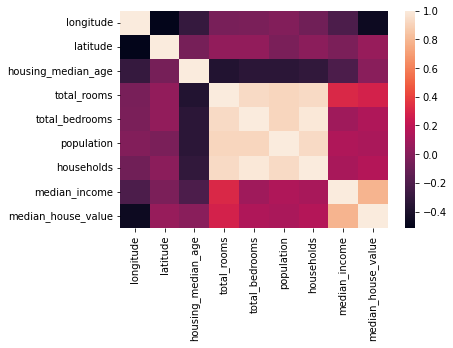

In [10]:
sns.heatmap(df_USAhousing.corr())

Create a displot showing "median_house_value".

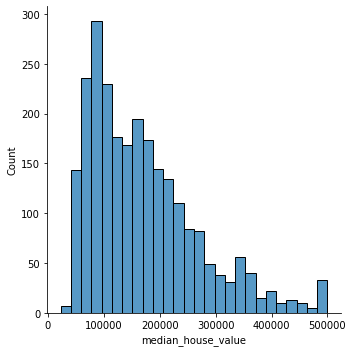

In [11]:
# TODO 2a: Your code goes here
sns.displot(df_USAhousing['median_house_value'])

Text(0.5, 0, 'median_house_value')

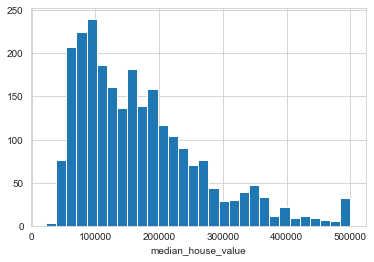

In [12]:
sns.set_style('whitegrid')
df_USAhousing['median_house_value'].hist(bins=30)
plt.xlabel('median_house_value')

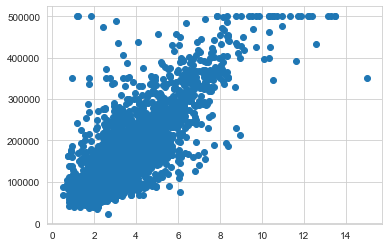

In [13]:
x = df_USAhousing['median_income']
y = df_USAhousing['median_house_value']

plt.scatter(x, y)
plt.show()

Create a jointplot showing "median_income"  versus "median_house_value".

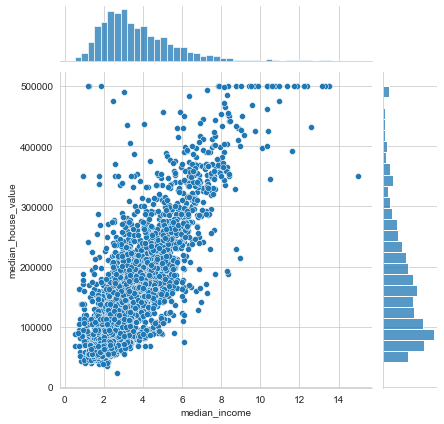

In [14]:
# TODO 2b: Your code goes here
# sns.jointplot(x, y)
sns.jointplot(x='median_income', y='median_house_value', data=df_USAhousing)

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

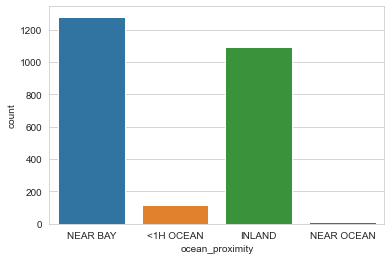

In [15]:
sns.countplot(x = 'ocean_proximity', data=df_USAhousing)

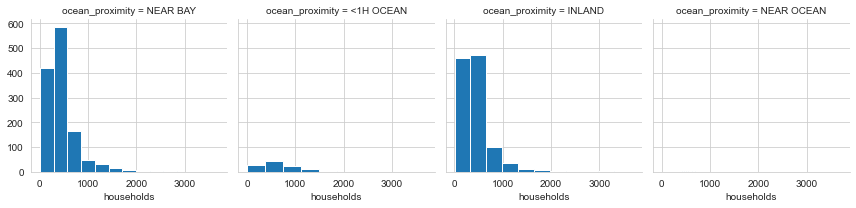

In [16]:
# takes numeric only?
#plt.figure(figsize=(20,20))
g = sns.FacetGrid(df_USAhousing, col="ocean_proximity")
g.map(plt.hist, "households");

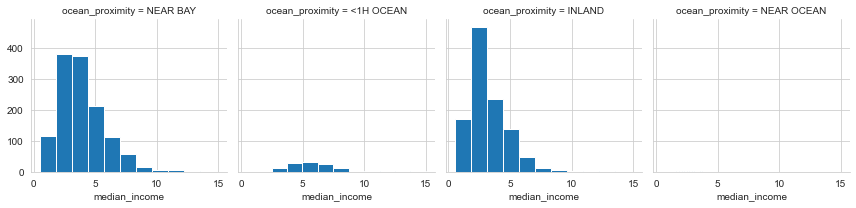

In [17]:
# takes numeric only?
#plt.figure(figsize=(20,20))
g = sns.FacetGrid(df_USAhousing, col="ocean_proximity")
g.map(plt.hist, "median_income");

You can see below that this is the state of California!

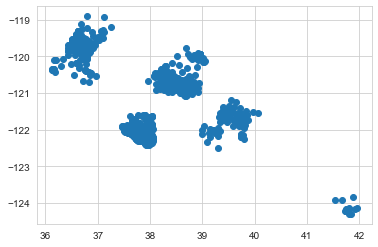

In [18]:
x = df_USAhousing['latitude']
y = df_USAhousing['longitude']

plt.scatter(x, y)
plt.show()

# Explore and create ML datasets

In this notebook, we will explore data corresponding to taxi rides in New York City to build a Machine Learning model in support of a fare-estimation tool. The idea is to suggest a likely fare to taxi riders so that they are not surprised, and so that they can protest if the charge is much higher than expected.

## Learning objectives
* Access and explore a public BigQuery dataset on NYC Taxi Cab rides
* Visualize your dataset using the Seaborn library


First, **restart the Kernel**.  Now, let's start with the Python imports that we need.

In [19]:
from google.cloud import bigquery
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%load_ext google.cloud.bigquery
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/Users/k-kakimoto/.config/gcloud/project-036dfba0-6f20-4903-e71bc0de3bc9.json"


<h3> Extract sample data from BigQuery </h3>

The dataset that we will use is <a href="https://console.cloud.google.com/bigquery?project=nyc-tlc&p=nyc-tlc&d=yellow&t=trips&page=table">a BigQuery public dataset</a>. Click on the link, and look at the column names. Switch to the Details tab to verify that the number of records is one billion, and then switch to the Preview tab to look at a few rows.

Let's write a SQL query to pick up interesting fields from the dataset. It's a good idea to get the timestamp in a predictable format.

In [22]:
%%bigquery
SELECT
FORMAT_TIMESTAMP("%Y-%m-%d %H:%M:%S %Z", pickup_datetime) AS pickup_datetime,
pickup_longitude, pickup_latitude, dropoff_longitude,
dropoff_latitude, passenger_count, trip_distance, tolls_amount,
fare_amount, total_amount
FROM `nyc-tlc.yellow.trips`
LIMIT 10

# from google.cloud import bigquery
# TODO 3: Set correct BigQuery public dataset for nyc-tlc yellow taxi cab trips
# Tip: For projects with hyphens '-' be sure to escape with backticks ``


,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
0,2009-02-21 11:18:00 UTC,-73.907022,40.751902,-73.906735,40.751867,2,0.06,0.0,2.5,2.5
1,2011-03-24 23:12:00 UTC,-73.967637,40.761357,-73.967757,40.761223,1,0.00,0.0,2.5,3.5
2,2009-11-02 22:28:00 UTC,-73.808352,40.688103,-73.809093,40.689398,2,0.14,0.0,2.5,3.5
3,2010-06-11 05:20:00 UTC,-73.786248,40.644517,-73.786513,40.644857,1,0.07,0.0,2.5,3.5
4,2013-11-22 07:04:00 UTC,-73.954522,40.787340,-73.954393,40.787322,1,0.01,0.0,2.5,3.0
5,2009-07-28 17:10:00 UTC,-73.978682,40.777327,-73.976342,40.776405,3,0.14,0.0,2.5,3.5
6,2009-03-03 23:34:46 UTC,-73.982753,40.735584,-73.982754,40.735577,1,0.00,0.0,3.0,3.0
7,2013-04-03 08:12:00 UTC,0.000000,0.000000,0.000000,0.000000,1,0.00,0.0,2.5,3.0
8,2012-02-27 15:37:00 UTC,-73.794358,40.669832,-73.794363,40.669827,2,0.00,0.0,2.5,3.0
9,2014-09-09 13:01:00 UTC,-73.979247,40.755100,-73.979862,40.755387,1,0.04,0.0,2.5,3.0


Let's increase the number of records so that we can do some neat graphs.  There is no guarantee about the order in which records are returned, and so no guarantee about which records get returned if we simply increase the LIMIT. To properly sample the dataset, let's use the HASH of the pickup time and return 1 in 100,000 records -- because there are 1 billion records in the data, we should get back approximately 10,000 records if we do this.

We will also store the BigQuery result in a Pandas dataframe named "trips"

In [23]:
%%bigquery trips
SELECT
    FORMAT_TIMESTAMP(
        "%Y-%m-%d %H:%M:%S %Z", pickup_datetime) AS pickup_datetime,
    pickup_longitude, pickup_latitude,
    dropoff_longitude, dropoff_latitude,
    passenger_count,
    trip_distance,
    tolls_amount,
    fare_amount,
    total_amount
FROM
    `nyc-tlc.yellow.trips`
WHERE
    ABS(MOD(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING)), 100000)) = 1


In [24]:
print(len(trips))

10789


In [25]:
# We can slice Pandas dataframes as if they were arrays
trips[:10]

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
0,2014-10-06 15:16:00 UTC,-73.980130,40.760910,-73.861730,40.768330,2,11.47,5.33,36.5,47.33
1,2014-12-08 21:50:00 UTC,-73.870867,40.773782,-74.003297,40.708215,2,11.81,0.00,33.5,37.50
2,2010-05-26 16:15:03 UTC,-74.002922,40.714474,-73.978505,40.758280,1,6.10,0.00,20.9,25.76
3,2012-03-30 18:28:20 UTC,-73.976148,40.776154,-74.010156,40.715113,1,5.70,0.00,17.3,18.80
4,2011-12-03 10:28:00 UTC,-73.998822,40.680933,-73.968960,40.757878,1,8.28,0.00,20.9,25.58
5,2014-05-20 23:09:00 UTC,-73.995203,40.727307,-73.948775,40.813487,1,10.31,0.00,33.5,38.00
6,2012-05-05 22:46:05 UTC,-74.009790,40.712483,-73.959293,40.768908,1,5.20,0.00,16.9,19.90
7,2010-12-21 13:08:00 UTC,-73.982422,40.739847,-73.981658,40.768732,2,2.64,0.00,14.9,15.40
8,2013-12-09 15:03:00 UTC,-73.990950,40.749772,-73.870807,40.774070,1,9.44,5.33,29.0,34.83
9,2009-03-28 20:30:35 UTC,-73.973926,40.757725,-73.981695,40.761591,1,0.50,0.00,4.6,4.60


<h3> Exploring data </h3>

Let's explore this dataset and clean it up as necessary. We'll use the Python Seaborn package to visualize graphs and Pandas to do the slicing and filtering.

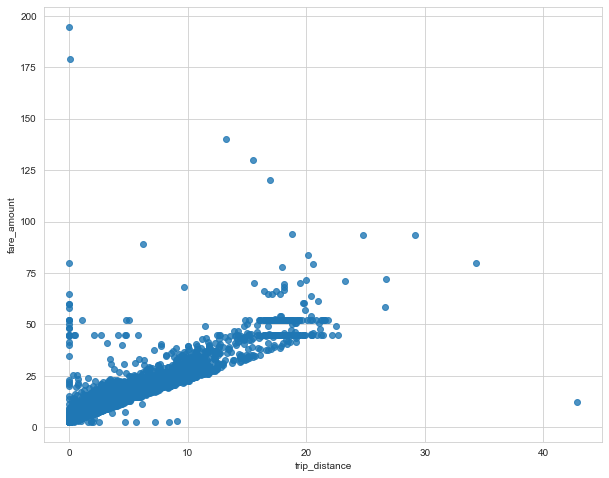

In [27]:
# TODO 4: Visualize your dataset using the Seaborn library.
# Plot the distance of the trip as X and the fare amount as Y.
ax = sns.regplot(x="trip_distance", y="fare_amount", fit_reg=False, ci=None, truncate=True, data=trips)
ax.figure.set_size_inches(10, 8)

Hmm ... do you see something wrong with the data that needs addressing?

It appears that we have a lot of invalid data that is being coded as zero distance and some fare amounts that are definitely illegitimate. Let's remove them from our analysis. We can do this by modifying the BigQuery query to keep only trips longer than zero miles and fare amounts that are at least the minimum cab fare ($2.50).

Note the extra WHERE clauses.

In [32]:
%%bigquery trips
SELECT
    FORMAT_TIMESTAMP(
        "%Y-%m-%d %H:%M:%S %Z", pickup_datetime) AS pickup_datetime,
    pickup_longitude, pickup_latitude, 
    dropoff_longitude, dropoff_latitude,
    passenger_count,
    trip_distance,
    tolls_amount,
    fare_amount,
    total_amount
FROM
    `nyc-tlc.yellow.trips`
WHERE
    ABS(MOD(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING)), 100000)) = 1
    # TODO 4a: Filter the data to only include non-zero distance trips and fares above $2.50
    AND fare_amount >= 2.50
    AND trip_distance > 0

In [33]:
print(len(trips))

10716


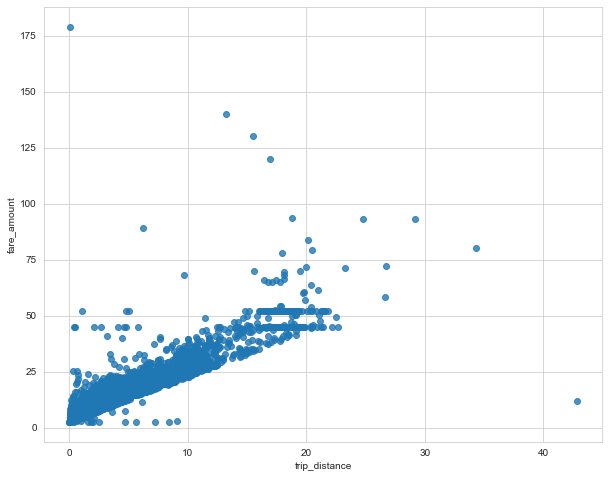

In [34]:
ax = sns.regplot(
    x="trip_distance", y="fare_amount",
    fit_reg=False, ci=None, truncate=True, data=trips)
ax.figure.set_size_inches(10, 8)

What's up with the streaks around 45 dollars and 50 dollars?  Those are fixed-amount rides from JFK and La Guardia airports into anywhere in Manhattan, i.e. to be expected. Let's list the data to make sure the values look reasonable.

Let's also examine whether the toll amount is captured in the total amount.

In [35]:
tollrides = trips[trips["tolls_amount"] > 0]
tollrides[tollrides["pickup_datetime"] == "2012-02-27 09:19:10 UTC"]

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
30,2012-02-27 09:19:10 UTC,-73.874431,40.774011,-73.983967,40.744082,1,11.6,4.8,27.7,38.0


In [38]:
notollrides = trips[trips["tolls_amount"] == 0]
notollrides[notollrides["pickup_datetime"] == "2012-02-27 09:19:10 UTC"]
# notollrides

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
45,2012-02-27 09:19:10 UTC,-73.972311,40.753067,-73.957389,40.817824,1,5.6,0.0,16.9,22.62
7800,2012-02-27 09:19:10 UTC,-73.987582,40.725468,-74.016628,40.715534,1,2.8,0.0,12.1,15.75
10538,2012-02-27 09:19:10 UTC,-74.015483,40.715279,-73.998045,40.756273,1,3.3,0.0,10.9,13.40


Looking at a few samples above, it should be clear that the total amount reflects fare amount, toll and tip somewhat arbitrarily -- this is because when customers pay cash, the tip is not known.  So, we'll use the sum of fare_amount + tolls_amount as what needs to be predicted.  Tips are discretionary and do not have to be included in our fare estimation tool.

Let's also look at the distribution of values within the columns.

In [39]:
trips.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
count,10716.000000,10716.000000,10716.000000,10716.000000,10716.000000,10716.000000,10716.000000,10716.000000,10716.000000
mean,-72.602192,40.002372,-72.594838,40.002052,1.650056,2.856395,0.226428,11.109446,13.217078
std,9.982373,5.474670,10.004324,5.474648,1.283577,3.322024,1.135934,9.137710,10.953156
min,-74.258183,0.000000,-74.260472,0.000000,0.000000,0.010000,0.000000,2.500000,2.500000
25%,-73.992153,40.735936,-73.991566,40.734310,1.000000,1.040000,0.000000,6.000000,7.300000
50%,-73.981851,40.753264,-73.980373,40.752956,1.000000,1.770000,0.000000,8.500000,10.000000
75%,-73.967399,40.767340,-73.964142,40.767510,2.000000,3.160000,0.000000,12.500000,14.600000
max,0.000000,41.366138,0.000000,41.366138,6.000000,42.800000,16.000000,179.000000,179.000000


Copyright 2021 Google Inc.  Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at
http://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.